In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('vehicle.csv',sep=';')

In [3]:
df.head()

,brand,model,body,year,mileage,fuel,seller,transmission,city,color,price
0,suzuki,ertiga-2016-2018,mpv,2018,"11,000 KM",gasoline,dealer,maunal,Manila,NaN,668000
1,toyota,hiace-2015-2018,van,2017,"25,000 KM",diesel,dealer,manual,Manila,NaN,1388000
2,hyundai,grand-starex,minivans,2017,"15,000 KM",diesel,dealer,manual,Manila,NaN,898000
3,hyundai,h-100,minivans,2019,"8,000 KM",diesel,dealer,manual,Manila,NaN,1078000
4,honda,br-v,crossover,2018,"10,000 KM",gasoline,dealer,cvt,Manila,NaN,898000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3909 non-null   object
 1   model         3902 non-null   object
 2   body          3909 non-null   object
 3   year          3909 non-null   int64 
 4   mileage       3506 non-null   object
 5   fuel          3909 non-null   object
 6   seller        3909 non-null   object
 7   transmission  3674 non-null   object
 8   city          3909 non-null   object
 9   color         3506 non-null   object
 10  price         3909 non-null   object
dtypes: int64(1), object(10)
memory usage: 336.1+ KB


# Data cleaning

In [5]:
def mileage(x):
    #print(x)
    x = x.replace(',', '').replace(' KM','')
    #print(x)
    
    return x

df['mileage']=df['mileage'].astype('str')
df['mileage']=df['mileage'].apply(mileage)
df['mileage']=pd.to_numeric(df['mileage'],errors='coerce')
df['mileage']=df['mileage'].astype('Int64')



In [6]:
df['fuel']=df['fuel'].apply(lambda x: x if (x=='gasoline' or x=='diesel') else 'gasoline')

In [7]:
import re
df['model']=df['model'].astype(str)
df['model']=df['model'].apply(lambda x: re.sub(('(-\d{4})*'), '', x))

In [8]:
df['body']=df['body'].apply(lambda x: x if ( x!='convertibles') else 'convertible')
df['body']=df['body'].apply(lambda x: x if ( x!='minivans') else 'van')
df['body']=df['body'].apply(lambda x: x if ( x!='muv') else 'mpv')

In [9]:
df['body'].value_counts()

sedan              1105
suv                1062
mpv                 555
hatchback           396
van                 360
pickup-trucks       238
crossover           103
coupe                58
luxury-vehicles      16
convertible           7
roadster              6
station-wagon         3
Name: body, dtype: int64

In [10]:
#convert maUNAL to maNUAl
def trans_cor(x):
    if x=='maunal':
        return 'manual'
    elif x == 'cvt' or x == 'dual-clutch':
        return 'automatic'
    else:
        return x
    
df['transmission']= df['transmission'].apply(trans_cor)

In [11]:
def trans_impute(cols):
    trans = cols[0]
    body = cols[1]
    if pd.isnull(trans):
        if body=='van'or body =='mpv' or body =='minivan' or body =='pickup-trucks' or body == 'muv':
            return 'manual'
        else:
            return 'automatic'
    else:
        return trans
    
df['transmission']=df[['transmission','body']].apply(trans_impute,axis=1)

In [12]:
df['price']=pd.to_numeric(df['price'],errors='coerce')
#df['price']=df['price'].astype('Int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3909 non-null   object 
 1   model         3909 non-null   object 
 2   body          3909 non-null   object 
 3   year          3909 non-null   int64  
 4   mileage       3506 non-null   Int64  
 5   fuel          3909 non-null   object 
 6   seller        3909 non-null   object 
 7   transmission  3909 non-null   object 
 8   city          3909 non-null   object 
 9   color         3506 non-null   object 
 10  price         3906 non-null   float64
dtypes: Int64(1), float64(1), int64(1), object(8)
memory usage: 339.9+ KB


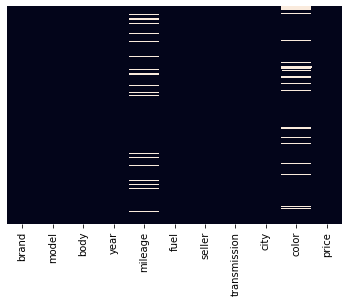

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [15]:
df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)

In [16]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)

In [17]:
df['color'].fillna(df['color'].value_counts().index[0],inplace=True)


In [18]:
df_backup=df.copy()

In [19]:
df[df['body']=='convertible']

,brand,model,body,year,mileage,fuel,seller,transmission,city,color,price
42,porsche,nan,convertible,2018,8000,gasoline,dealer,automatic,Manila,Silver / Grey,5300000.0
2515,bmw,7-series-sedan,convertible,2011,40000,gasoline,dealer,automatic,Cavite City,Black,2088000.0
2650,bmw,3-series-sedan,convertible,2001,22552,gasoline,dealer,automatic,Manila,Black,1450000.0
3702,bmw,7-series-sedan,convertible,2011,40000,gasoline,dealer,automatic,Cavite City,Black,2188000.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3886 non-null   object 
 1   model         3886 non-null   object 
 2   body          3886 non-null   object 
 3   year          3886 non-null   int64  
 4   mileage       3886 non-null   Int64  
 5   fuel          3886 non-null   object 
 6   seller        3886 non-null   object 
 7   transmission  3886 non-null   object 
 8   city          3886 non-null   object 
 9   color         3886 non-null   object 
 10  price         3886 non-null   float64
dtypes: Int64(1), float64(1), int64(1), object(8)
memory usage: 337.9+ KB


In [21]:
eco = df.drop(df[df['brand']=='porsche'].index)
eco = eco.drop(eco[eco['brand']=='mercedes-benz'].index)
eco = eco.drop(eco[eco['brand']=='ferrari'].index)
eco = eco.drop(eco[eco['brand']=='bmw'].index)
eco = eco.drop(eco[eco['brand']=='jaguar'].index)
eco = eco.drop(eco[eco['brand']=='audi'].index)

eco = eco.drop(eco[eco['brand']=='land-rover'].index)
eco = eco.drop(eco[eco['brand']=='maserati'].index)
eco = eco.drop(eco[eco['brand']=='lexus'].index)
eco = eco.drop(eco[eco['brand']=='cadillac'].index)
eco = eco.drop(eco[eco['brand']=='gmc'].index)
eco = eco.drop(eco[eco['brand']=='lincoln'].index)

eco = eco.drop(eco[eco['brand']=='dodge'].index)
eco = eco.drop(eco[eco['brand']=='aston-martin'].index)
eco = eco.drop(eco[eco['brand']=='chrysler'].index)
eco = eco.drop(eco[eco['brand']=='hummer'].index)



eco = eco.drop(eco[eco['brand']=='mini'].index)
eco = eco.drop(eco[eco['brand']=='jeep'].index)
eco = eco.drop(eco[eco['brand']=='volvo'].index)
eco = eco.drop(eco[eco['brand']=='volkswagen'].index)
eco = eco.drop(eco[eco['brand']=='peugeot'].index)
eco = eco.drop(eco[eco['brand']=='infiniti'].index).reset_index() 

In [22]:
eco = eco.drop(['city','color'],axis=1)

In [23]:
eco['brand'].value_counts()

toyota        1708
mitsubishi     368
ford           325
hyundai        313
honda          208
chevrolet      168
nissan         136
isuzu           95
suzuki          82
kia             81
subaru          68
mazda           68
foton           13
haima            2
byd              2
datsun           1
tata             1
owner            1
great-wall       1
jmc              1
Name: brand, dtype: int64

In [24]:
eco['body'].value_counts()

sedan            1033
suv               967
mpv               549
hatchback         375
van               347
pickup-trucks     237
crossover         100
coupe              32
station-wagon       2
Name: body, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

numerics = ['year', 'mileage']
scaler=StandardScaler()
scaled=scaler.fit(eco[numerics])

#from sklearn.externals import joblib
#joblib.dump(scaled,'num_scaler.pkl')
from joblib import dump, load
dump(scaled, 'num_scaler.joblib')
scaled=scaler.transform(eco[numerics])
scaled
pr_num = pd.DataFrame(scaled, columns=numerics)
pr_num

,year,mileage
0,0.762712,-0.458978
1,0.506292,-0.180161
2,0.506292,-0.379316
3,1.019132,-0.518725
4,0.762712,-0.478894
...,...,...
3637,0.249872,-0.160246
3638,-0.262968,0.238064
3639,-1.288648,0.935107
3640,-0.775808,0.516882


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = list(eco.select_dtypes(include=[object]).columns)

column_trans = ColumnTransformer([("cat",OneHotEncoder(sparse=False,drop='first'), cat_cols)])

cat = column_trans.fit(eco[cat_cols]) 
dump(cat,'cat_scaler.joblib')

cat = column_trans.transform(eco[cat_cols]) 
cat_encoder = column_trans.named_transformers_["cat"]
x = cat_encoder.categories_
new_list = []

for i in x:
    for y in i[1:]:
        #print(y)
        new_list.append(y)

pr_cat = pd.DataFrame(cat, columns=new_list)

pr_cat

,chevrolet,datsun,ford,foton,great-wall,haima,honda,hyundai,isuzu,jmc,...,hatchback,mpv,pickup-trucks,sedan,station-wagon,suv,van,gasoline,individual,manual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3638,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
 cat_encoder.categories_

[array(['byd', 'chevrolet', 'datsun', 'ford', 'foton', 'great-wall',
        'haima', 'honda', 'hyundai', 'isuzu', 'jmc', 'kia', 'mazda',
        'mitsubishi', 'nissan', 'owner', 'subaru', 'suzuki', 'tata',
        'toyota'], dtype=object),
 array(['2', '2-hatchback', '3', '3-sedan', '350z', '370z', '6', '86',
        'accent', 'accent-hatch', 'accord', 'adventure', 'almera',
        'alphard', 'alterra', 'altima', 'alto-800', 'apv', 'asx', 'avanza',
        'aveo', 'b2500', 'br-v', 'brio', 'brio-amaze', 'brz', 'bt-50',
        'camaro', 'camry', 'captiva', 'carens', 'carnival', 'carry',
        'celerio', 'celica', 'ciaz', 'city', 'civic', 'colorado',
        'corolla', 'corolla-altis', 'corvette', 'cr-v', 'crosswind',
        'cruze', 'cx-3', 'cx-5', 'cx-7', 'cx-9', 'd-max', 'e-150',
        'ecosport', 'elantra', 'eon', 'ertiga', 'escape', 'everest',
        'exalta', 'expedition', 'explorer', 'f0', 'f150', 'fiesta',
        'fiesta-sedan', 'fj-cruiser', 'focus', 'focus-sedan', 'for

In [28]:
X = pd.concat([pr_num,pr_cat],axis=1)
#X.head()
#X['convertible']

In [29]:
y=eco['price']

In [30]:
eco['price']

0        668000.0
1       1388000.0
2        898000.0
3       1078000.0
4        898000.0
          ...    
3637      30000.0
3638     698000.0
3639     588000.0
3640     578000.0
3641     488000.0
Name: price, Length: 3642, dtype: float64

In [31]:
# Data Modelling

In [32]:
## 30 Seconds to run this code block.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10], 'max_features': [2, 4, 6, 8,10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rfr= RandomForestRegressor()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.cv_results_

{'mean_fit_time': array([0.04296865, 0.10549655, 0.04296956, 0.10283275, 0.03517222,
        0.09556184, 0.03488822, 0.09598274, 0.03504539, 0.09582462,
        0.04480119, 0.13056808, 0.05121803, 0.14270964, 0.04643459,
        0.13845415]),
 'std_fit_time': array([0.00521149, 0.00616592, 0.0014135 , 0.00696611, 0.00192793,
        0.00265404, 0.00177133, 0.00302482, 0.00180404, 0.00388443,
        0.00434458, 0.00385359, 0.0051084 , 0.0095065 , 0.00300048,
        0.0113268 ]),
 'mean_score_time': array([0.00519705, 0.00780702, 0.00559597, 0.00743937, 0.00438471,
        0.006073  , 0.00470691, 0.00564361, 0.00432687, 0.00623922,
        0.0047761 , 0.00415745, 0.00501995, 0.00663762, 0.00452371,
        0.00563135]),
 'std_score_time': array([0.00039911, 0.00193862, 0.00048982, 0.00177552, 0.00243127,
        0.0023068 , 0.00133938, 0.00368418, 0.00234531, 0.00118665,
        0.00406032, 0.00191947, 0.00087649, 0.00157543, 0.00245756,
        0.00320073]),
 'param_max_features': mas

In [34]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042969,0.005211,0.005197,0.000399,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2.345437e+11,-2.794003e+11,...,-1.930519e+11,9.013099e+10,11,-4.297290e+10,-4.640164e+10,-7.476904e+10,-7.038056e+10,-4.965268e+10,-5.683536e+10,1.309741e+10
1,0.105497,0.006166,0.007807,0.001939,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.754871e+11,-2.163527e+11,...,-1.573554e+11,7.904246e+10,4,-1.995507e+10,-1.878129e+10,-2.688990e+10,-2.627027e+10,-2.883262e+10,-2.414583e+10,4.008739e+09
2,0.042970,0.001414,0.005596,0.000490,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-2.556855e+11,-3.811004e+11,...,-2.230882e+11,1.068517e+11,16,-4.709659e+10,-5.255936e+10,-3.856726e+10,-4.981451e+10,-3.718049e+10,-4.504364e+10,6.119387e+09
3,0.102833,0.006966,0.007439,0.001776,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.862957e+11,-2.518957e+11,...,-1.611800e+11,8.882172e+10,5,-2.044828e+10,-2.146981e+10,-2.506823e+10,-2.933257e+10,-2.992426e+10,-2.524863e+10,3.896035e+09
4,0.035172,0.001928,0.004385,0.002431,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.618605e+11,-2.769545e+11,...,-2.222599e+11,7.836957e+10,15,-5.346548e+10,-3.645757e+10,-4.156103e+10,-5.677958e+10,-4.013772e+10,-4.568028e+10,7.956762e+09
5,0.095562,0.002654,0.006073,0.002307,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.612085e+11,-3.728465e+11,...,-1.850481e+11,1.201518e+11,9,-2.521640e+10,-2.378632e+10,-3.494178e+10,-3.359391e+10,-2.272669e+10,-2.805302e+10,5.153202e+09
6,0.034888,0.001771,0.004707,0.001339,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.889156e+11,-2.889766e+11,...,-2.008261e+11,9.933024e+10,13,-6.719375e+10,-3.728751e+10,-4.767325e+10,-5.724810e+10,-3.849622e+10,-4.957977e+10,1.137220e+10
7,0.095983,0.003025,0.005644,0.003684,8,10,NaN,"{'max_features': 8, 'n_estimators': 10}",-2.032982e+11,-2.712252e+11,...,-1.687345e+11,8.793910e+10,7,-2.207354e+10,-2.682380e+10,-2.867846e+10,-2.462333e+10,-1.910898e+10,-2.426162e+10,3.392387e+09
8,0.035045,0.001804,0.004327,0.002345,10,3,NaN,"{'max_features': 10, 'n_estimators': 3}",-2.819928e+11,-3.332284e+11,...,-2.084913e+11,1.070852e+11,14,-5.693525e+10,-5.340410e+10,-4.762180e+10,-7.147447e+10,-3.808383e+10,-5.350389e+10,1.101910e+10
9,0.095825,0.003884,0.006239,0.001187,10,10,NaN,"{'max_features': 10, 'n_estimators': 10}",-1.639222e+11,-2.648693e+11,...,-1.659792e+11,9.204803e+10,6,-2.173202e+10,-2.044195e+10,-2.955897e+10,-2.761123e+10,-1.972961e+10,-2.381476e+10,3.995278e+09


In [35]:
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [36]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("")
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

439376.6892737179 {'max_features': 2, 'n_estimators': 3}
396680.49858045735 {'max_features': 2, 'n_estimators': 10}
472322.1409869345 {'max_features': 4, 'n_estimators': 3}
401472.2952495515 {'max_features': 4, 'n_estimators': 10}
471444.50826833135 {'max_features': 6, 'n_estimators': 3}
430172.1249057091 {'max_features': 6, 'n_estimators': 10}
448136.2433587439 {'max_features': 8, 'n_estimators': 3}
410773.0249053389 {'max_features': 8, 'n_estimators': 10}
456608.5028638499 {'max_features': 10, 'n_estimators': 3}
407405.4340770571 {'max_features': 10, 'n_estimators': 10}
446055.78226186335 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
387664.16772234335 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
431235.8470469701 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
393337.8870422808 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
413306.7243050108 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
382798.883629786 {'bootstrap': F

In [37]:
pd.DataFrame(grid_search.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042969,0.005211,0.005197,0.000399,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2.345437e+11,-2.794003e+11,...,-1.930519e+11,9.013099e+10,11,-4.297290e+10,-4.640164e+10,-7.476904e+10,-7.038056e+10,-4.965268e+10,-5.683536e+10,1.309741e+10
1,0.105497,0.006166,0.007807,0.001939,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.754871e+11,-2.163527e+11,...,-1.573554e+11,7.904246e+10,4,-1.995507e+10,-1.878129e+10,-2.688990e+10,-2.627027e+10,-2.883262e+10,-2.414583e+10,4.008739e+09
2,0.042970,0.001414,0.005596,0.000490,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-2.556855e+11,-3.811004e+11,...,-2.230882e+11,1.068517e+11,16,-4.709659e+10,-5.255936e+10,-3.856726e+10,-4.981451e+10,-3.718049e+10,-4.504364e+10,6.119387e+09
3,0.102833,0.006966,0.007439,0.001776,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.862957e+11,-2.518957e+11,...,-1.611800e+11,8.882172e+10,5,-2.044828e+10,-2.146981e+10,-2.506823e+10,-2.933257e+10,-2.992426e+10,-2.524863e+10,3.896035e+09
4,0.035172,0.001928,0.004385,0.002431,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.618605e+11,-2.769545e+11,...,-2.222599e+11,7.836957e+10,15,-5.346548e+10,-3.645757e+10,-4.156103e+10,-5.677958e+10,-4.013772e+10,-4.568028e+10,7.956762e+09


In [38]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.98963358e-01, 1.08274280e-01, 8.29791078e-03, 8.35566588e-04,
       9.24760378e-03, 2.70428320e-04, 3.08877306e-06, 5.30446589e-06,
       1.92256513e-03, 2.83690487e-03, 8.69228988e-04, 3.43014073e-05,
       1.44691772e-03, 4.76602487e-04, 3.53350906e-03, 5.48791935e-03,
       8.26523731e-05, 4.05609505e-04, 2.16670686e-03, 2.05662811e-05,
       1.93433922e-02, 2.36313934e-04, 2.35573118e-05, 5.15714374e-05,
       2.31972355e-04, 5.41954958e-04, 3.65840376e-06, 3.59750149e-04,
       2.68100399e-03, 4.06940148e-05, 1.06275110e-04, 2.09972001e-03,
       5.29953751e-04, 3.59000236e-03, 2.05523216e-04, 7.72518204e-05,
       4.44397301e-05, 1.91509603e-04, 1.08139531e-05, 4.08960749e-03,
       2.04619840e-05, 4.42221887e-05, 1.18183408e-04, 2.83141968e-05,
       1.95820574e-05, 8.78407559e-05, 6.43809619e-05, 1.84891935e-02,
       3.80673978e-04, 1.82356660e-04, 5.13863290e-04, 6.20340515e-05,
       8.02139836e-05, 4.50396831e-04, 2.75678906e-05, 1.29368478e-04,
      

In [39]:
feats = pd.DataFrame()
feats["Name"] = list(X.columns)
feats["Score"] = feature_importances

In [40]:
feats.sort_values("Score",ascending=False).round(5).head(50)

,Name,Score
0,year,0.19896
1,mileage,0.10827
210,gasoline,0.07989
99,gt-r,0.05580
61,corvette,0.04730
205,pickup-trucks,0.04307
122,land-cruiser-prado,0.04133
81,f150,0.03551
212,manual,0.02878
206,sedan,0.02744


In [41]:
final_model = grid_search.best_estimator_

In [42]:

dict_client = {}

dict_client["brand"] = 'honda'
dict_client["model"] = 'civic'
dict_client["body"] = 'crossover'

dict_client["year"] = 2017
dict_client["mileage"] = 5000
dict_client["fuel"] = 'gasoline'

dict_client["seller"] = 'individual'
dict_client["transmission"] = 'automatic'
dict_client["price"] = 1200000
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T

print(df_client)



   brand  model       body  year mileage      fuel      seller transmission  \
0  honda  civic  crossover  2017    5000  gasoline  individual    automatic   

     price  
0  1200000  


In [43]:
numerics = ['year', 'mileage']

scaler =  load('num_scaler.joblib') 

print('success')
scaled=scaler.transform(df_client[numerics])
scaled
pr_num = pd.DataFrame(scaled, columns=numerics)
print(pr_num)


success
       year   mileage
0  0.506292 -0.578471


In [44]:

column_trans = load('cat_scaler.joblib')

cat = column_trans.transform(df_client)      
cat_encoder = column_trans.named_transformers_["cat"]
x = cat_encoder.categories_
new_list = []

for i in x:
    for y in i[1:]:
        #print(y)
        new_list.append(y)

new_cat = pd.DataFrame(cat, columns=new_list)

print(new_cat)
test= pd.concat([pr_num,new_cat],axis=1)

   chevrolet  datsun  ford  foton  great-wall  haima  honda  hyundai  isuzu  \
0        0.0     0.0   0.0    0.0         0.0    0.0    1.0      0.0    0.0   

   jmc  ...  hatchback  mpv  pickup-trucks  sedan  station-wagon  suv  van  \
0  0.0  ...        0.0  0.0            0.0    0.0            0.0  0.0  0.0   

   gasoline  individual  manual  
0       1.0         1.0     0.0  

[1 rows x 211 columns]


C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [45]:
print(final_model.predict(test))

[868300.]


In [46]:
df_client

,brand,model,body,year,mileage,fuel,seller,transmission,price
0,honda,civic,crossover,2017,5000,gasoline,individual,automatic,1200000


In [47]:
dump(final_model,'car_predict.joblib')

['car_predict.joblib']

In [48]:
clf = load('car_predict.joblib') 

In [49]:
print(clf.predict(test))

[868300.]
